In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
Df1997 = pd.read_csv('1997.csv')
Df1998 = pd.read_csv('1998.csv')
Df1999 = pd.read_csv('1999.csv')

In [3]:
Df1997.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1997,1,28,2,1615.0,1615,1728.0,1725,WN,1159,...,4,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1997,1,29,3,1624.0,1615,1735.0,1725,WN,1159,...,4,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1997,1,30,4,1626.0,1615,1730.0,1725,WN,1159,...,2,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1997,1,31,5,1628.0,1615,1729.0,1725,WN,1159,...,4,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1997,1,14,2,1503.0,1425,1619.0,1535,WN,1221,...,4,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
Df1997.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                97763
CRSDepTime                 0
ArrTime               109844
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime     109844
CRSElapsedTime          4849
AirTime               109844
ArrDelay              109844
DepDelay               97763
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     5411843
Diverted                   0
CarrierDelay         5411843
WeatherDelay         5411843
NASDelay             5411843
SecurityDelay        5411843
LateAircraftDelay    5411843
dtype: int64

In [6]:
Df1998.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               144509
CRSDepTime                 0
ArrTime               157670
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime     157670
CRSElapsedTime          2386
AirTime               157670
ArrDelay              157670
DepDelay              144509
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     5384721
Diverted                   0
CarrierDelay         5384721
WeatherDelay         5384721
NASDelay             5384721
SecurityDelay        5384721
LateAircraftDelay    5384721
dtype: int64

In [7]:
Df1999.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               154311
CRSDepTime                 0
ArrTime               167866
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime     167866
CRSElapsedTime          8992
AirTime               167866
ArrDelay              167866
DepDelay              154311
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     5527884
Diverted                   0
CarrierDelay         5527884
WeatherDelay         5527884
NASDelay             5527884
SecurityDelay        5527884
LateAircraftDelay    5527884
dtype: int64

These are the number of missing values in each columns. Here we can see that some columns are completely exmpty having all the values are missing. We first remove that. 

In [8]:
Df1997 = Df1997.drop(['CancellationCode', 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis = 1)
Df1998 = Df1998.drop(['CancellationCode', 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis = 1)
Df1999 = Df1999.drop(['CancellationCode', 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis = 1)


Now after removing some columsn compeltely, we can remove the rest rows with missing vlaues to clean our data.

In [9]:
Df1997Clean = Df1997.dropna()
Df1998Clean = Df1998.dropna()
Df1999Clean = Df1999.dropna()

In [10]:
Totall1997 = len(Df1997Clean)

In [11]:
Totall1998 = len(Df1998Clean)

In [12]:
Totall1999 = len(Df1999Clean)

In [14]:
data = pd.concat([Df1997Clean, Df1998Clean, Df1999Clean])

### Best time of the Day, Month and Year to fly to minimize delays. 

In [15]:
dataArr = data[data['ArrDelay']<1]
dataDep = data[data['DepDelay']<1]

In [16]:
dataArr.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
5,1997,1,1,3,1029.0,1020,1127.0,1130,WN,1293,...,52.0,-3.0,9.0,ABQ,PHX,328,2,4,0,0
6,1997,1,2,4,1020.0,1020,1130.0,1130,WN,1293,...,57.0,0.0,0.0,ABQ,PHX,328,7,6,0,0
10,1997,1,7,2,1020.0,1020,1123.0,1130,WN,1293,...,56.0,-7.0,0.0,ABQ,PHX,328,2,5,0,0
12,1997,1,9,4,1020.0,1020,1130.0,1130,WN,1293,...,59.0,0.0,0.0,ABQ,PHX,328,3,8,0,0
13,1997,1,10,5,1020.0,1020,1123.0,1130,WN,1293,...,56.0,-7.0,0.0,ABQ,PHX,328,2,5,0,0


In [17]:
dataArr['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

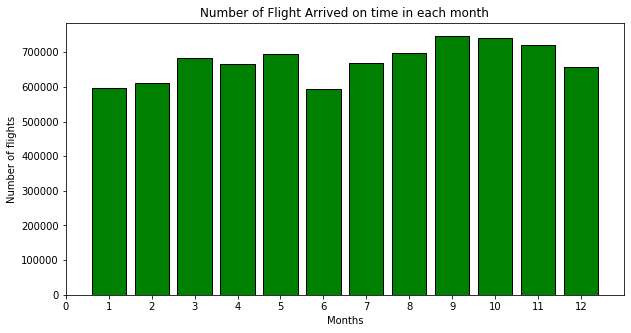

In [18]:
plt.figure(figsize= (10,5))
bins = np.arange(14) - 0.5
plt.hist(dataArr['Month'], bins, rwidth = 0.8, color = 'green', edgecolor = 'black')
plt.xticks(range(13))
plt.title("Number of Flight Arrived on time in each month")
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.xlim([0, 13])
plt.show()

The best months of the year for flight to avoid delay are May and September. 

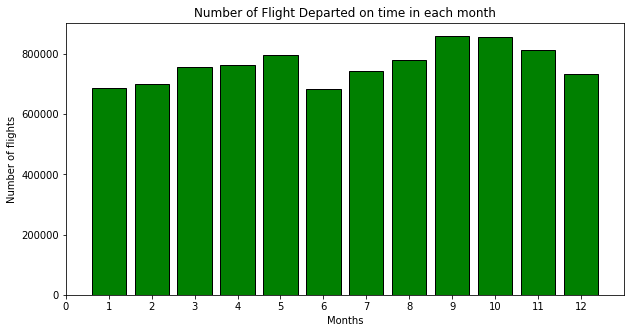

In [19]:
plt.figure(figsize= (10,5))
bins = np.arange(14) - 0.5
plt.hist(dataDep['Month'], bins, rwidth = 0.8, color = 'green', edgecolor = 'black')
plt.xticks(range(13))
plt.title("Number of Flight Departed on time in each month")
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.xlim([0, 13])
plt.show()

Again in term of Departure point of view, the best months of the year for flight to avoid delay are May, September and October.


### Best Day of Week

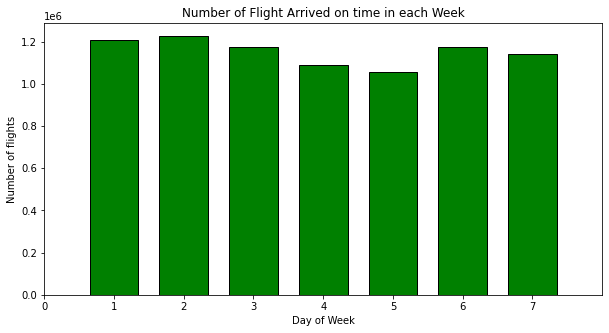

In [20]:
plt.figure(figsize= (10,5))
bins = np.arange(9) - 0.5
plt.hist(dataArr['DayOfWeek'], bins, rwidth = 0.7, color = 'green', edgecolor = 'black')
plt.xticks(range(8))
plt.title("Number of Flight Arrived on time in each Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of flights")
plt.xlim([0, 8])
plt.show()

The best day of week is Tuesday. 

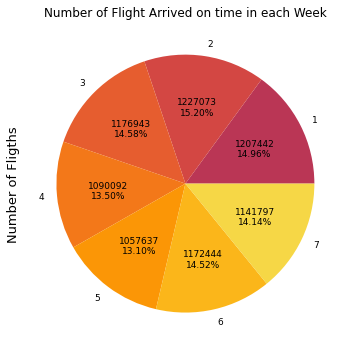

In [21]:
def label_function(val):
    return f'{val / 100 * len(dataArr):.0f}\n{val:.2f}%'

colors = cm.inferno_r(np.linspace(.5, .1, 7))
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
dataArr.groupby('DayOfWeek').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 9},
                                  colors=colors, ax=ax1)
ax1.set_ylabel('Number of Fligths', size=13)
ax1.set_title("Number of Flight Arrived on time in each Week")
plt.tight_layout()
plt.show()

### Best day of the month. 

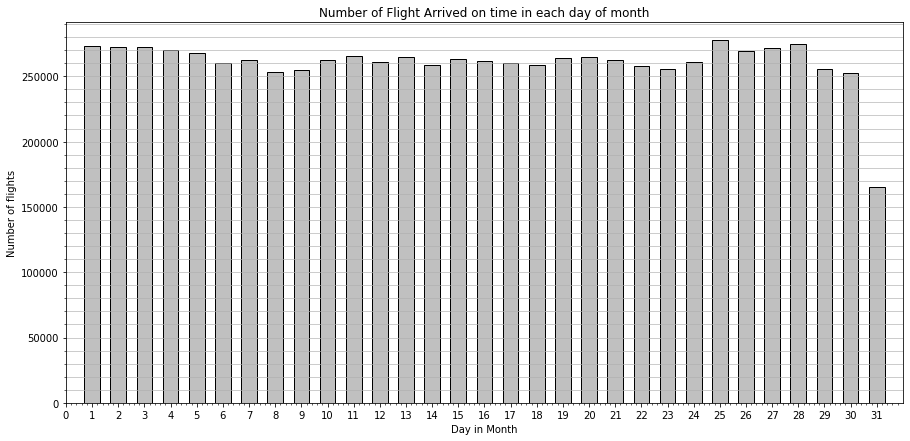

In [22]:
plt.figure(figsize= (15,7))
bins = np.arange(33) - 0.5
plt.hist(dataArr['DayofMonth'], bins, rwidth = 0.6, color = 'silver', edgecolor = 'black')
plt.xticks(range(32))
plt.title("Number of Flight Arrived on time in each day of month")
plt.xlabel("Day in Month")
plt.ylabel("Number of flights")
plt.xlim([0, 32])
plt.minorticks_on()
plt.grid(axis = 'y', which = 'minor', alpha = 0.8)
plt.grid(axis = 'y', which = 'major', alpha = 0.8)
plt.show()

## Do older planes suffer more delays?

In [23]:
dataArr

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
5,1997,1,1,3,1029.0,1020,1127.0,1130,WN,1293,...,52.0,-3.0,9.0,ABQ,PHX,328,2,4,0,0
6,1997,1,2,4,1020.0,1020,1130.0,1130,WN,1293,...,57.0,0.0,0.0,ABQ,PHX,328,7,6,0,0
10,1997,1,7,2,1020.0,1020,1123.0,1130,WN,1293,...,56.0,-7.0,0.0,ABQ,PHX,328,2,5,0,0
12,1997,1,9,4,1020.0,1020,1130.0,1130,WN,1293,...,59.0,0.0,0.0,ABQ,PHX,328,3,8,0,0
13,1997,1,10,5,1020.0,1020,1123.0,1130,WN,1293,...,56.0,-7.0,0.0,ABQ,PHX,328,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5527878,1999,12,15,3,1912.0,1918,2117.0,2129,AA,1359,...,106.0,-12.0,-6.0,BNA,DFW,631,13,6,0,0
5527879,1999,12,16,4,1910.0,1910,2112.0,2117,AA,1359,...,96.0,-5.0,0.0,BNA,DFW,631,14,12,0,0
5527880,1999,12,17,5,1909.0,1910,2111.0,2117,AA,1359,...,97.0,-6.0,-1.0,BNA,DFW,631,10,15,0,0
5527881,1999,12,18,6,1907.0,1910,2103.0,2117,AA,1359,...,95.0,-14.0,-3.0,BNA,DFW,631,12,9,0,0


In [24]:
onTime1997 = len(dataArr[dataArr['Year']==1997])
onTime1998 = len(dataArr[dataArr['Year']==1998])
onTime1999 = len(dataArr[dataArr['Year']==1999])

In [25]:
Delay1997 = Totall1997 - onTime1997
DelayPercentage1997 = (Delay1997/Totall1997)*100
DelayPercentage1997

51.17707491080251

In [26]:
Delay1998 = Totall1998 - onTime1998
DelayPercentage1998 = (Delay1998/Totall1998)*100
DelayPercentage1998

48.05935507420915

In [27]:
Delay1999 = Totall1999 - onTime1999
DelayPercentage1999 = (Delay1999/Totall1999)*100
DelayPercentage1999

48.32343846606486

The percentage of flight delayed in 1997 is 51% while for other two years that is 1998 and 1999 are below 50%. It shows that older planes suffer more delays then newer. Furthermore, here delay means a plane didn't reach to its destination in scheduled time. If a plane delayed for one mint is also considered as delayed plane. It is the reason that this percentage is qiute high as compare to others. 

## How does the number of people flying between different locations change over time?

In [28]:
Df1997Clean['Origin'].value_counts()[:10].index.tolist() 

['ORD', 'ATL', 'DFW', 'LAX', 'STL', 'PHX', 'DTW', 'SFO', 'MSP', 'DEN']

In [29]:
Df1998Clean['Origin'].value_counts()[:10].index.tolist() 

['ORD', 'ATL', 'DFW', 'LAX', 'STL', 'PHX', 'DTW', 'DEN', 'SFO', 'MSP']

In [30]:
Df1999Clean['Origin'].value_counts()[:10].index.tolist() 

['ORD', 'ATL', 'DFW', 'LAX', 'PHX', 'STL', 'DTW', 'MSP', 'DEN', 'SFO']

Above are the origin of flights that are most repeted. These are the top ten most repetited origin arrange in decending order. In the start names, there are no difference, but in fifth place in 1999, PHX repeted more than STL. Similarly, the eight place origin is different for all three years. In 1997, the SFP are at eight place, while DEN for 1998, and MSP is for 1999. 

In [31]:
Df1997Clean['Dest'].value_counts()[:10].index.tolist() 

['ORD', 'ATL', 'DFW', 'LAX', 'STL', 'PHX', 'DTW', 'SFO', 'MSP', 'DEN']

In [32]:
Df1998Clean['Dest'].value_counts()[:10].index.tolist() 

['ORD', 'ATL', 'DFW', 'LAX', 'STL', 'PHX', 'DTW', 'DEN', 'SFO', 'MSP']

In [33]:
Df1999Clean['Dest'].value_counts()[:10].index.tolist() 

['ORD', 'ATL', 'DFW', 'LAX', 'PHX', 'STL', 'DTW', 'MSP', 'DEN', 'SFO']

In destination point of view, the most repited in all three years is ORD. It goes same in all three years but there is a differnt in fifth place. In 1999, it is PHX unlike STL in 1997 and 1998. Similarly, the eight most repeted destination in 1997 is SFO, but in 1998 it is DEN and in 1999, it is MSP. 

## Can you detect cascading failures as delays in one airport create delays in others?

To know the cascading failures as delays in one airport create delays in others, we will check anyone of the three given years. For the purpose of this question we will take 1998 dataset. 

In [34]:
Df1998CleanOriginORD = Df1998Clean[Df1998Clean['Origin']=='ORD']
Df1998CleanOriginORD.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
8285,1998,1,1,4,2152.0,0,18.0,0,AA,483,...,194.0,-33.0,-3.0,ORD,PHX,1440,2,10,0,0
8286,1998,1,2,5,2155.0,0,36.0,0,AA,483,...,201.0,-15.0,0.0,ORD,PHX,1440,5,15,0,0
8287,1998,1,3,6,2216.0,0,51.0,0,AA,483,...,199.0,0.0,21.0,ORD,PHX,1440,5,11,0,0
8288,1998,1,4,7,2158.0,0,56.0,0,AA,483,...,210.0,5.0,3.0,ORD,PHX,1440,3,25,0,0
8289,1998,1,5,1,2218.0,0,134.0,0,AA,483,...,209.0,43.0,23.0,ORD,PHX,1440,4,43,0,0


In [35]:
Df1998CleanOriginORD.iloc[4]

Year                   1998
Month                     1
DayofMonth                5
DayOfWeek                 1
DepTime              2218.0
CRSDepTime                0
ArrTime               134.0
CRSArrTime                0
UniqueCarrier            AA
FlightNum               483
TailNum              N454AA
ActualElapsedTime     256.0
CRSElapsedTime        236.0
AirTime               209.0
ArrDelay               43.0
DepDelay               23.0
Origin                  ORD
Dest                    PHX
Distance               1440
TaxiIn                    4
TaxiOut                  43
Cancelled                 0
Diverted                  0
Name: 8289, dtype: object

Here we can see that the tail number 'N454AA' of a flight departed 23 mint late from origin "ORD". Its is destination is "PHX". The arrival time was 22:18, but it is departure delayed upto 43 mint and arrival delayed upto 23 mint. Now we will check what is happening in PHX as Origin. 

In [36]:
Df1998CleanOriginPHX = Df1998Clean[Df1998Clean['Origin']=='PHX']
Df1998CleanOriginPHX[(Df1998CleanOriginPHX['Month']==1) & (Df1998CleanOriginPHX['DayofMonth']==6) & (Df1998CleanOriginPHX['TailNum']=='N9304C')]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
38630,1998,1,6,2,149.0,135,147.0,142,TW,139,...,48.0,5.0,14.0,PHX,SAN,304,3,7,0,0


Here at PHX, the delay occur to another flight with tail number "N9304C". It was sheduled to launch at 1:35, but it departed at 1:49. The late arrival of N454AA, causes N9304C become departed late from its scheduled time. 

### Use the available variables to construct a model that predicts delays

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
import seaborn as sn

In [38]:
modelData = Df1997[['DepDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut']]

In [39]:
modelData = modelData.dropna(axis=0, how='any')

In [40]:
# Extracting the predictive variables
X = modelData[['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut']]

# Extracting only the prediction variable
y = modelData['DepDelay']

In [41]:
# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('The shape of training features is:', X_train.shape)
print('The shape of testing features is:', X_test.shape)

The shape of training features is: (4241599, 6)
The shape of testing features is: (1060400, 6)


In [42]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
hist = model.fit(X_train, y_train,
          batch_size=256, epochs=10,
          validation_data=(X_test, y_test))

Epoch 1/10
16569/16569 [==============================] - 20s 1ms/step - loss: nan - accuracy: 0.2194 - val_loss: nan - val_accuracy: 0.2200
Epoch 2/10
16569/16569 [==============================] - 20s 1ms/step - loss: nan - accuracy: 0.2198 - val_loss: nan - val_accuracy: 0.2200
Epoch 3/10
16569/16569 [==============================] - 20s 1ms/step - loss: nan - accuracy: 0.2198 - val_loss: nan - val_accuracy: 0.2200
Epoch 4/10
16569/16569 [==============================] - 21s 1ms/step - loss: nan - accuracy: 0.2196 - val_loss: nan - val_accuracy: 0.2200
Epoch 5/10
16569/16569 [==============================] - 21s 1ms/step - loss: nan - accuracy: 0.2198 - val_loss: nan - val_accuracy: 0.2200
Epoch 6/10
16569/16569 [==============================] - 21s 1ms/step - loss: nan - accuracy: 0.2198 - val_loss: nan - val_accuracy: 0.2200
Epoch 7/10
16569/16569 [==============================] - 21s 1ms/step - loss: nan - accuracy: 0.2196 - val_loss: nan - val_accuracy: 0.2200
Epoch 8/10
16